# (6) Understanding CPD Emission

At this point, we've developed the code far enough to see the residual emission that might be associated with any circumplanetary disk (CPD) in the SR 4 disk gap.  After this part, we will develop the code that statistically vets those residuals.  But first, it would be helpful to get a better understanding of what we might actually expect from a CPD based on some theoretical models.  

So far, you've breezed through most of the coding exercises as I've set them up.  But here I'm going to give you some more "license" to explore on your own.  Please read through [this article](https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.1850Z/abstract) on simple CPD emission models at mm/radio wavelengths.  The goal of this part is to write some code that follows the methodology laid out in Section 2, to the point where you can reproduce Figures 1 and 2.  This will give us the infrastructure to compare what we can extract from the data to a theoretical basis at the end of the summer, and it will also give you a better idea about typical mm-wavelength emission properties of CPDs that will guide us in developing the statistical vetting approach in the subsequent parts of the project.

C:\Users\William\anaconda3\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in log10
C:\Users\William\anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log10


[ 0.         15.59043581 15.65024391 ...  0.11466521  0.11465349
  0.11464177]


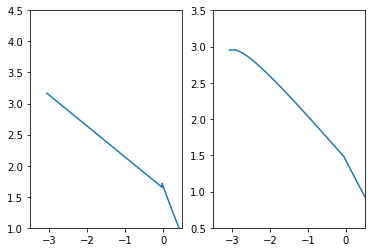

In [30]:
#your code here
import os, sys, time           
import numpy as np             
import matplotlib.pyplot as plt
%matplotlib inline               
import math

from frank.radial_fitters import FrankFitter
from frank.geometry import FixedGeometry
from frank.make_figs import use_frank_plotting_style, make_quick_fig
from frank.io import save_fit


def emission_simulator(R_inau, R_outau, R_p, M, M_dot, alpha, lambdar):
    Rau=np.linspace(R_inau, R_outau, 10000)
    R=Rau*1.49*10**11
    R_in=R_inau*1.49*10**(11)
    R_out=R_outau*1.49*10**(11)
    G=6.67*10**(-11)
    o_b=5.67*10**(-8)
    mu=2.4*10**(-3)
    Rg=8.31
    kappamm=0.034*(0.87/lambdar)*10**(-1)
    kappar=10*10**(-1)
    TISM=10
    ###surface density###
    sigmatrue=np.empty(len(R))
    for i in range(len(R)):  
        Tirrquart=(G*M*M_dot/(2*R_p*o_b*40*math.pi*R[i]**2))
        Textquart=TISM**4+Tirrquart
        Text=Textquart**(0.25)
        multiplier=2**(1.4)/(3**(1.2))*((mu/Rg)**(0.8))*(1-(R_in/R[i])**0.5)**(0.6)
        sigma1=multiplier*((o_b*G*M*M_dot**3/(alpha**4*math.pi**3*kappar*R[i]**3)))**0.2
        sigma2=M_dot*mu*np.sqrt(G*M/(R[i]**3))/(3*math.pi*alpha*Rg*Text)
        #sigmalist=np.array([sigma1,sigma2])
        #sigmatrue[i]=np.amin(sigmalist) 
        sigmatrue[i]=sigma1
    ###Brightness Temperature                                                                        
    Tb=np.empty(len(R))
    tau=np.empty(len(R))
    for i in range(len(R)):
        Tirrquart=(G*M*M_dot/(2*R_p*o_b*40*math.pi*R[i]**2))
        Teffquart=(3*G*M*M_dot/(8*R[i]**3*math.pi))*(1-(R_in/R[i])**0.5)
        
        Textquart=TISM**4+Tirrquart
        Text=Textquart**(0.25) 
        Tcquart=(9*G*M*M_dot*sigmatrue[i]*kappar/(128*R[i]**3*o_b*math.pi))*(1-(R_in/R[i])**0.5)+Textquart
        tau[i]=sigmatrue[i]*kappamm*0.5
        if tau[i] < 0.5: 
            Tb[i]=2*(Tcquart**0.25)*tau[i]

        else:
            Tb[i]=((3/8)*Teffquart*(kappar/kappamm)+Textquart)**0.25
    class my_class:
        def __init__(self,T,r,sigma):
            self.T=T
            self.r=r        
            self.sigma=sigma
    emissionobject=my_class(Tb, R, sigmatrue)
                                                                             
    #ig, (ax1, ax2)= plt.subplots(1,2)
    #x1.plot(R,Tb)
    #x2.plot(R,sigmatrue)
    
    fig, (ax3, ax4)= plt.subplots(1,2)
    r_lims = [-3.5, 0.5]
    s_lims = [0.5, 3.5]
    t_lims = [1, 4.5]
    ax3.plot(np.log10(Rau), np.log10(Tb))
    ax3.set_xlim(r_lims)
    ax3.set_ylim(t_lims)
    ax4.plot(np.log10(Rau),np.log10(sigmatrue*0.1))
    ax4.set_ylim(s_lims )
    ax4.set_xlim(r_lims)
    print(tau)                                                              
    return emissionobject

                                                                             
    
                                                                        
D=emission_simulator(4.612*10**(-4) ,4, 69.911*10**6, 1.898*10**27, 6.07*10**14, 0.01, 0.85)
                                                                             

                                                                             
   
        
                                                                             
                                                                            
    
                                                                             
    
                                        
    







In [24]:
i=2


In [25]:
l=np.linspace(0,3,100)
print(math.pi*l)

print(math.pi*l[89])
p=l**3.5
print(math.pi*p)

[0.         0.09519978 0.19039955 0.28559933 0.38079911 0.47599889
 0.57119866 0.66639844 0.76159822 0.856798   0.95199777 1.04719755
 1.14239733 1.23759711 1.33279688 1.42799666 1.52319644 1.61839622
 1.71359599 1.80879577 1.90399555 1.99919533 2.0943951  2.18959488
 2.28479466 2.37999443 2.47519421 2.57039399 2.66559377 2.76079354
 2.85599332 2.9511931  3.04639288 3.14159265 3.23679243 3.33199221
 3.42719199 3.52239176 3.61759154 3.71279132 3.8079911  3.90319087
 3.99839065 4.09359043 4.1887902  4.28398998 4.37918976 4.47438954
 4.56958931 4.66478909 4.75998887 4.85518865 4.95038842 5.0455882
 5.14078798 5.23598776 5.33118753 5.42638731 5.52158709 5.61678687
 5.71198664 5.80718642 5.9023862  5.99758598 6.09278575 6.18798553
 6.28318531 6.37838508 6.47358486 6.56878464 6.66398442 6.75918419
 6.85438397 6.94958375 7.04478353 7.1399833  7.23518308 7.33038286
 7.42558264 7.52078241 7.61598219 7.71118197 7.80638175 7.90158152
 7.9967813  8.09198108 8.18718085 8.28238063 8.37758041 8.47278